In [2]:
import numpy as np
boid_count = 10 #number of boids
limits = np.array([2000,2000]) #edges of simulation area

In [3]:
#Assigning the initial the random position to the group of boids
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]
positions

array([[ 691.52530004,  945.42834351, 1903.6310732 , 1757.81082431,
         542.96292674,   51.52018414, 1620.61463692, 1207.91562805,
        1194.81906906, 1574.66616224],
       [1988.96925712,  480.05633655, 1174.47558055,  686.39687221,
        1044.37553916, 1007.18973546,  778.20129106, 1007.97426653,
        1485.48866644, 1574.15015708]])

In [4]:
# defining the herd of boids by giving input of three paramters as follows
# 1. No of Boids = Count
# 2. Lower Limit
# 3. Upper Limit 
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

In [5]:
#Assigning the initial limit of operation == X-axis between 100 & 200 Y- Axis between 900 & 1100
positions = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))

In [6]:
# Assigning the initial limit of velocities 
# 0 - 10 in X direction 
# -20 to +20 in Y direction
velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))
velocities

array([[  3.35160226,   9.48804684,   8.94047732,   8.38778964,
          5.75003179,   0.12017933,   2.58754529,   2.8479758 ,
          6.10768603,   2.51888936],
       [  0.39084521,  14.65296696,  14.66282392,  -1.50293613,
        -19.49492738,   6.94045686,  -0.78068528,   0.34187078,
         18.8884372 ,  19.32871825]])

In [7]:
#Updating the position and velocity of each boid
positions += velocities

In [8]:
#importing matplotlib library for animation and plotting the results in the form of a graph
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

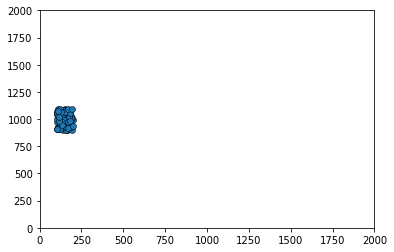

In [9]:
#Combining the above defined individual operations into a function for continuous operation for all number of Boids
#Plotting the Inital position as per the defined condition
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))

figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='o', edgecolor='k', lw=0.5)
scatter

In [10]:
# Seperation
# Plotting the initial position as per the defined condition
# this function updates the velocity and position and the second function defines the frame and uses the 
# Output from function 1 to draw the animation

def update_boids(positions, velocities): # Updating the position and velocity of each boid
    positions += velocities

def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())
    
anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)
#Combining the above defined individual operation into a function for continuous operation for all number of boids
# Assigning the initial limit of operation == X-axis between 100 & 200 Y-axis between 900 & 1100
positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))
#anim.save('boids_1.mp4')

from IPython.display import HTML
HTML(anim.to_jshtml())

In [11]:
# Cohesion 
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01 # assigned weight to the changing velocities
    middle = np.mean(positions, 1) # finding the mean postion upto one decimal place so that we can move upto that location
    direction_to_middle = positions - middle[:, np.newaxis] # As the Mean keeps changing continuously the direction also varies
    velocities -= direction_to_middle * move_to_middle_strength # the weight here used as a form of inertia for changing velocity
    positions += velocities # Updating velocity and position accordingly

# the below defined function is also same as of above which serves the main purpose of animation
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())
    
anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)

positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))
HTML(anim.to_jshtml())


In [32]:
#Collision Avoidance

def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis] #Using distance formula
    squared_displacements = separations * separations #Squaring the scalar value || Pythagoras theorem
    square_distances = np.sum(squared_displacements, 0)# Sum of all displacements
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations) #to avoid changes in seperation
    separations_if_close[0, :, :][far_away] = 0 #for boid 0 every point which is smaller than alert distance will be 0
    separations_if_close[1, :, :][far_away] = 0 #for boid 1 every point which is smaller than alert distance will be 0
    velocities += np.sum(separations_if_close, 1) #Sum of all
    positions += velocities
    
    
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)

positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))
HTML(anim.to_jshtml())

In [13]:
#Speed Matching and Alignment
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)
    
    
# Same as explained above for seperation 
    velocity_differences = velocities[:, np.newaxis, :] - velocities[:, :, np.newaxis]
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength

    positions += velocities
    
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())


anim = animation.FuncAnimation(figure, animate,
                               frames=200, interval=50)


positions = new_flock(100, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(100, np.array([0, -20]), np.array([10, 20]))
HTML(anim.to_jshtml())
